In [189]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

Data from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [190]:
 # Basic metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy   : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision  : {precision_score(y_true, y_pred):.2f}')
    print(f'Recall     : {recall_score(y_true, y_pred):.2f}')
    print(f'F1-score   : {f1_score(y_true, y_pred):.2f}')

In [415]:
rain = pd.read_csv('weatherAUS.csv')
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [416]:
print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')

The number of rows are 145460 and the number of columns are 23


In [417]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [288]:
categorical_col, contin_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [418]:
rain.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

<AxesSubplot:>

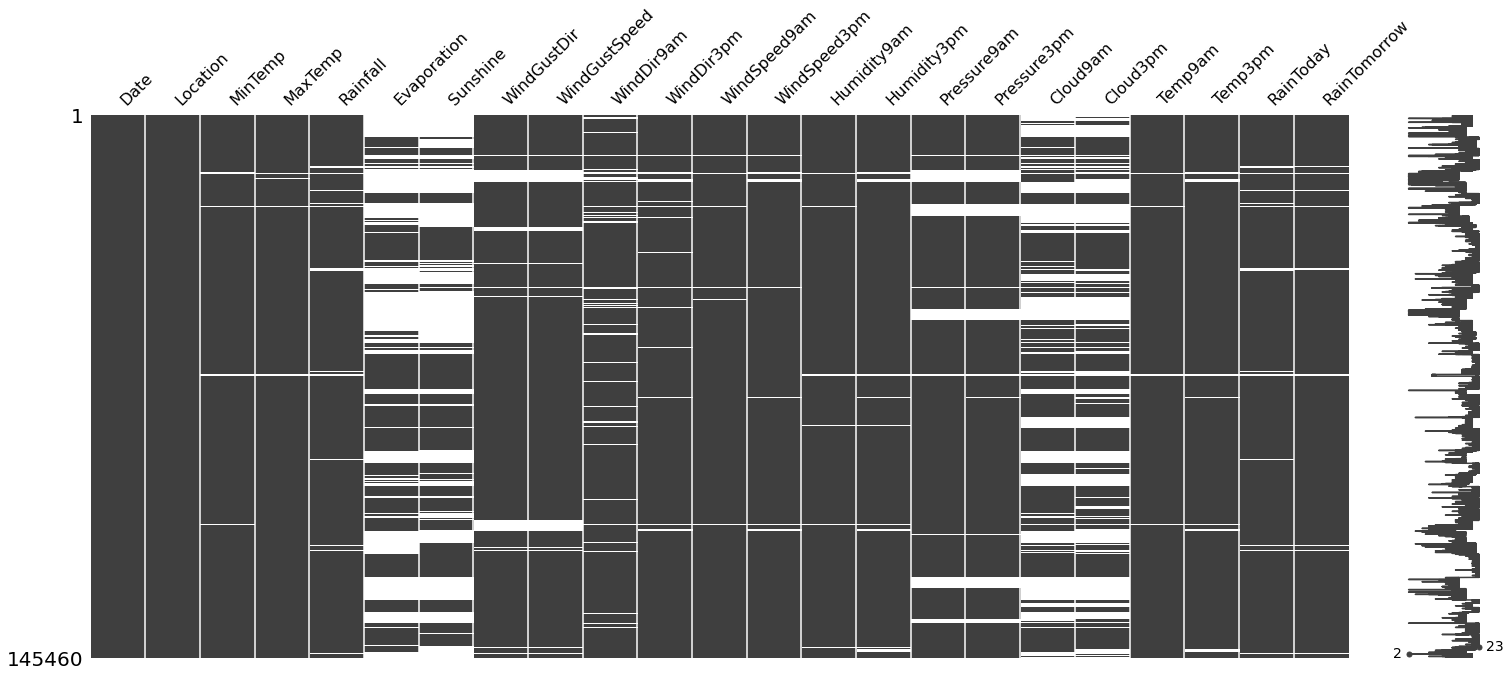

In [420]:
msno.matrix(rain)

In [421]:
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

print(rain.RainToday)
print(rain.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


In [422]:
#Checking percentage of missing data in every column
(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [423]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [424]:
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [425]:
#Filling the missing values for continuous variables with mode
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [426]:
(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       0.000000
WindGustSpeed     0.000000
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

0.0    113580
1.0     31880
Name: RainToday, dtype: int64
0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

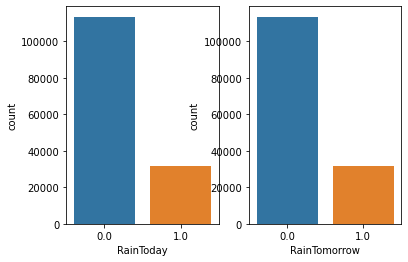

<Figure size 1440x1440 with 0 Axes>

In [298]:
fig, ax =plt.subplots(1,2)
print(rain.RainToday.value_counts())
print(rain.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=rain,x='RainToday',ax=ax[0])
sns.countplot(data=rain,x='RainTomorrow',ax=ax[1])

In [427]:
#Dropping date column
rain=rain.iloc[:,1:]
rain = rain.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)
rain

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
145456,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
145457,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0
145458,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0


In [428]:
# Pakeiciamos categorical values i grupes  strings tampa skaiciais
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

In [429]:
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (145460, 18)
Shape of DataFrame After Removing Outliers (138208, 18)


In [430]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0


In [431]:
rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [432]:
# subalansuoja data, kad butu po vienodai ir tu ir tu reiksmiu
# # .iloc[:,:-1]all rows, all columns except the last
# .iloc[:,-1] all rows, only the last column
os = SMOTE()
x, y = os.fit_resample(rain.iloc[:,:-1], rain.iloc[:,-1])
count = Counter(y)
print(count)

Counter({0.0: 109905, 1.0: 109905})


## Dataset split into three sets

In [474]:
xx, x_test, yy, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(xx,yy,test_size = 0.25,train_size =0.75)

In [434]:
classes1 = ['NoRain', 'Rain']

<BarContainer object of 2 artists>

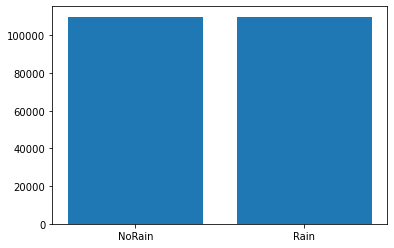

In [435]:
# Class balance
plt.figure()
plt.bar(classes1, [(y == 0).sum(), (y == 1).sum()])

In [436]:
 from sklearn.preprocessing import StandardScaler

# At first let's use only two features:
cols = ['MinTemp', 'Rainfall']
X_test = x_test[cols].values
X_train = x_train[cols].values

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [437]:
 from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty='none')
lr1.fit(X_train, y_train)

print('Training set:')
print_metrics(y_train, lr1.predict(X_train))
print()
print('Test set:')
print_metrics(y_test, lr1.predict(X_test))

Training set:
Accuracy   : 0.63
Precision  : 0.71
Recall     : 0.45
F1-score   : 0.55

Test set:
Accuracy   : 0.63
Precision  : 0.71
Recall     : 0.45
F1-score   : 0.55


In [475]:
# Normalize the data
scaler = StandardScaler()
X2_train = scaler.fit_transform(x_train)
X2_test = scaler.transform(x_test)
X2_val = scaler.transform(x_val)


In [439]:
lr2 = LogisticRegression(penalty='none')
lr2.fit(X2_train, y_train)
print('Training set:')
print_metrics(y_train, lr2.predict(X2_train))
print()
print('Test set:')
print_metrics(y_test, lr2.predict(X2_test))

Training set:
Accuracy   : 0.77
Precision  : 0.77
Recall     : 0.75
F1-score   : 0.76

Test set:
Accuracy   : 0.76
Precision  : 0.78
Recall     : 0.75
F1-score   : 0.76


Text(0.5, 1.0, 'All features')

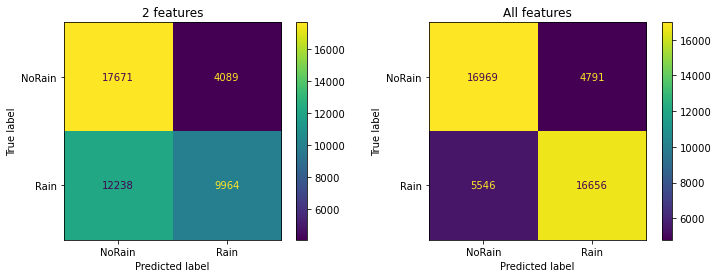

In [440]:
from sklearn.metrics import plot_confusion_matrix

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_confusion_matrix(lr1, X_test, y_test, display_labels=classes1, ax=ax1)
ax1.set_title('2 features')

plot_confusion_matrix(lr2, X2_test, y_test, display_labels=classes1, ax=ax2)
ax2.set_title('All features')

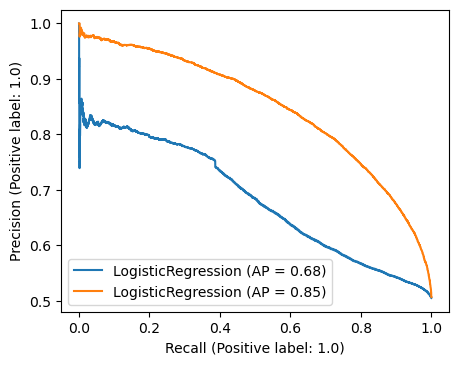

In [441]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(5, 4), dpi=100)
ax = plt.gca()
plot_precision_recall_curve(lr1, X_test, y_test, ax=ax) # blue line
plot_precision_recall_curve(lr2, X2_test, y_test, ax=ax) # yellow line

## DIY Logistic Regression

Sigmoid function description

In [354]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

Logistic Regression

In [355]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
    return weights

In [356]:
def prediction(X_duomenys, y_duomenys):
    
    weights = logistic_regression(X_duomenys, y_duomenys, num_steps = 300, learning_rate = 5e-5, add_intercept=True)
    data_with_intercept = np.hstack((np.ones((X_duomenys.shape[0], 1)),X_duomenys))
    final_scores = np.dot(data_with_intercept, weights)
    
    return np.round(sigmoid(final_scores))

## DIY and scikit logistic regression comparison

In [442]:
print('Training set:')
print_metrics(y_train, lr2.predict(X2_train))
print()
print('Test set:')
print_metrics(y_test, lr2.predict(X2_test))

Training set:
Accuracy   : 0.77
Precision  : 0.77
Recall     : 0.75
F1-score   : 0.76

Test set:
Accuracy   : 0.76
Precision  : 0.78
Recall     : 0.75
F1-score   : 0.76


In [443]:
print('Training set:')
print_metrics(y_train, prediction(X2_train, y_train))
print()
print('Test set:')
print_metrics(y_test, prediction(X2_test, y_test))

Training set:
Accuracy   : 0.71
Precision  : 0.71
Recall     : 0.71
F1-score   : 0.71

Test set:
Accuracy   : 0.77
Precision  : 0.78
Recall     : 0.75
F1-score   : 0.76


## Model evaluation and tuning

Two different classification algorithms were chosen: 
- K-nearest neighbour
- Decision tree

Three different feature sets consist of: 
- Set1 - Train/validation/test split = 60/20/20 (18 features)
- Set2 - Train/validation/test split = 80/10/10 (18 features)
- Set3 - Train/validation/test split = 40/30/30 (18 features)


### Data sets

Set1 - is the same as set X2_train that was previously used for logistic regression

Set2  

In [476]:
xx2, x_test2, yy2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=42)
x_train2, x_val2, y_train2, y_val2 = train_test_split(xx2,yy2,test_size = 0.11111,train_size =0.88889)


In [477]:
# Normalize the data
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)
x_val2 = scaler.transform(x_val2)

Set3 

In [478]:
xx3, x_test3, yy3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=42)
x_train3, x_val3, y_train3, y_val3 = train_test_split(xx3,yy3,test_size = 0.43,train_size =0.57)
# Normalize the data
scaler = StandardScaler()
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)
x_val3 = scaler.transform(x_val3)


### Decision Tree

In [479]:
from sklearn.tree import DecisionTreeClassifier

medis = DecisionTreeClassifier()
medis1 = medis.fit(X2_train, y_train)
medis2 = medis.fit(x_train2, y_train2)
medis3 = medis.fit(x_train3, y_train3)


In [480]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

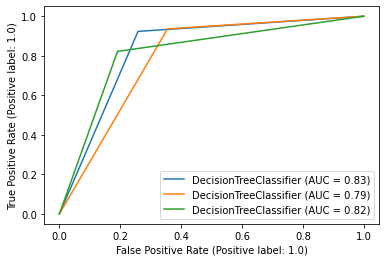

In [481]:
roc = plot_roc_curve(medis1, X2_val, y_val) # blue line
plot_roc_curve(medis2, x_val2, y_val2, ax=roc.ax_) # orange line
plot_roc_curve(medis3, x_val3, y_val3, ax=roc.ax_) # green line

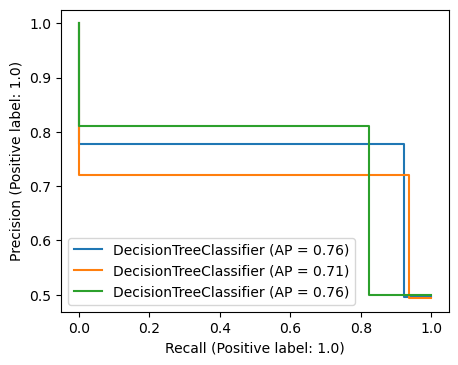

In [482]:
# Precision-recall curves
plt.figure(figsize=(5, 4), dpi=100)
ax = plt.gca()
plot_precision_recall_curve(medis1, X2_val, y_val, ax=ax) # blue line
plot_precision_recall_curve(medis2, x_val2, y_val2, ax=ax) # yellow
plot_precision_recall_curve(medis3, x_val3, y_val3, ax=ax) # green

Text(0.5, 1.0, 'Decision tree of Set3 40/30/30')

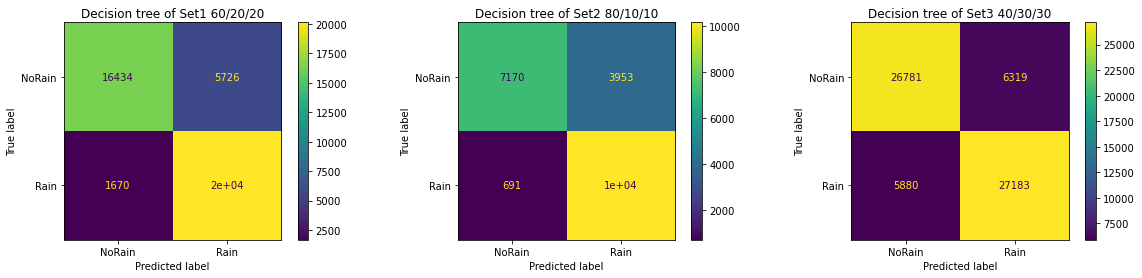

In [483]:
 # Confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
plot_confusion_matrix(medis1, X2_val, y_val, display_labels=classes1, ax=ax1)
ax1.set_title('Decision tree of Set1 60/20/20')

plot_confusion_matrix(medis2, x_val2, y_val2, display_labels=classes1, ax=ax2)
ax2.set_title('Decision tree of Set2 80/10/10')

plot_confusion_matrix(medis3, x_val3, y_val3, display_labels=classes1, ax=ax3)
ax3.set_title('Decision tree of Set3 40/30/30')

In [500]:
print('Training set1:')
print_metrics(y_train, medis1.predict(X2_train))
print()
print('Validation set1:')
print_metrics(y_val, medis1.predict(X2_val))

Training set1:
Accuracy   : 0.83
Precision  : 0.78
Recall     : 0.92
F1-score   : 0.85

Validation set1:
Accuracy   : 0.83
Precision  : 0.78
Recall     : 0.92
F1-score   : 0.84


In [501]:
print('Training set2:')
print_metrics(y_train2, medis2.predict(x_train2))
print()
print('Validation set2:')
print_metrics(y_val2, medis2.predict(x_val2))

Training set2:
Accuracy   : 0.79
Precision  : 0.72
Recall     : 0.93
F1-score   : 0.81

Validation set2:
Accuracy   : 0.79
Precision  : 0.72
Recall     : 0.94
F1-score   : 0.81


In [502]:
print('Training set3:')
print_metrics(y_train3, medis3.predict(x_train3))
print()
print('Test set3:')
print_metrics(y_val3, medis3.predict(x_val3))

Training set3:
Accuracy   : 1.00
Precision  : 1.00
Recall     : 1.00
F1-score   : 1.00

Test set3:
Accuracy   : 0.82
Precision  : 0.81
Recall     : 0.82
F1-score   : 0.82


### XGB Classifier

In [487]:
from sklearn.neighbors import NearestNeighbors

In [488]:
xgbc = XGBClassifier(objective='binary:logistic')
xgb1 = xgbc.fit(X2_train, y_train)
xgb2 = xgbc.fit(x_train2, y_train2)
xgb3 = xgbc.fit(x_train3, y_train3)

[23:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'XGB Classifier of Set3 40/30/30')

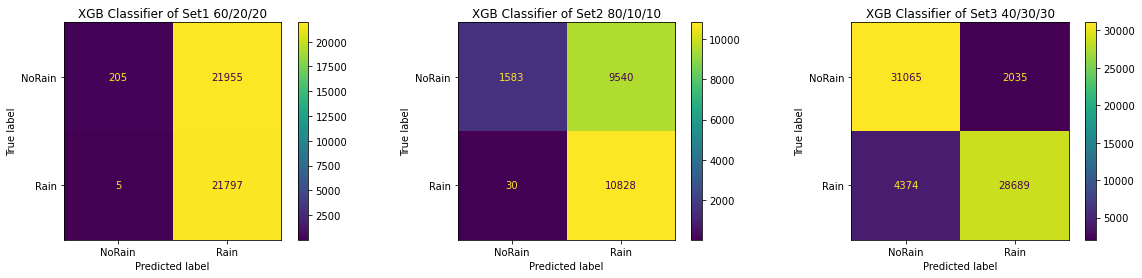

In [492]:
 # Confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
plot_confusion_matrix(xgb1, X2_val, y_val, display_labels=classes1, ax=ax1)
ax1.set_title('XGB Classifier of Set1 60/20/20')

plot_confusion_matrix(xgb2, x_val2, y_val2, display_labels=classes1, ax=ax2)
ax2.set_title('XGB Classifier of Set2 80/10/10')

plot_confusion_matrix(xgb3, x_val3, y_val3, display_labels=classes1, ax=ax3)
ax3.set_title('XGB Classifier of Set3 40/30/30')

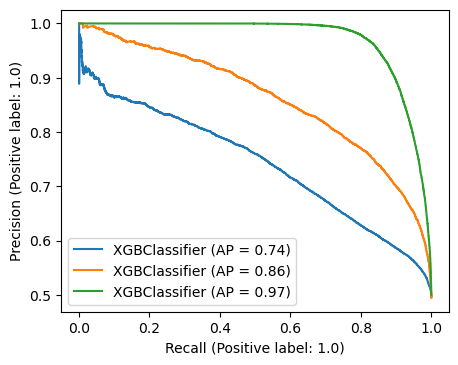

In [496]:
# Precision-recall curves
plt.figure(figsize=(5, 4), dpi=100)
ax = plt.gca()
plot_precision_recall_curve(xgb1, X2_val, y_val, ax=ax) # blue line
plot_precision_recall_curve(xgb2, x_val2, y_val2, ax=ax) # yellow
plot_precision_recall_curve(xgb3, x_val3, y_val3, ax=ax) # green

In [497]:
print('Training set1:')
print_metrics(y_train, xgb1.predict(X2_train))
print()
print('Validation set1:')
print_metrics(y_val, xgb1.predict(X2_val))

Training set1:
Accuracy   : 0.50
Precision  : 0.50
Recall     : 1.00
F1-score   : 0.67

Validation set1:
Accuracy   : 0.50
Precision  : 0.50
Recall     : 1.00
F1-score   : 0.67


In [498]:
print('Training set2:')
print_metrics(y_train2, xgb2.predict(x_train2))
print()
print('Validation set2:')
print_metrics(y_val2, xgb2.predict(x_val2))

Training set2:
Accuracy   : 0.57
Precision  : 0.54
Recall     : 1.00
F1-score   : 0.70

Validation set2:
Accuracy   : 0.56
Precision  : 0.53
Recall     : 1.00
F1-score   : 0.69


In [509]:
print('Training set3:')
print_metrics(y_train3, xgb3.predict(x_train3))
print()
print('Test set3:')
print_metrics(y_val3, xgb3.predict(x_val3))

Training set3:
Accuracy   : 0.92
Precision  : 0.96
Recall     : 0.89
F1-score   : 0.92

Test set3:
Accuracy   : 0.90
Precision  : 0.93
Recall     : 0.87
F1-score   : 0.90


For tuning, hyperparameter (learning rate) adjustment for XGB Classifier was chosen

In [524]:
xgbc_tun = XGBClassifier(learning_rate=0.4, objective='binary:logistic')
xgb3t = xgbc_tun.fit(x_train3, y_train3)
print('Training set3, learning_rate=0.4')
print_metrics(y_train3, xgb3t.predict(x_train3))
print()
print('Test set3:')
print_metrics(y_val3, xgb3t.predict(x_val3))

[00:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set3, learning_rate=0.4
Accuracy   : 0.93
Precision  : 0.96
Recall     : 0.90
F1-score   : 0.93

Test set3:
Accuracy   : 0.90
Precision  : 0.93
Recall     : 0.87
F1-score   : 0.90


In [518]:
xgbc_tun = XGBClassifier(learning_rate=0.6, objective='binary:logistic')
xgb3t = xgbc_tun.fit(x_train3, y_train3)
print('Training set3:')
print_metrics(y_train3, xgb3t.predict(x_train3))
print()
print('Test set3:')
print_metrics(y_val3, xgb3t.predict(x_val3))

[00:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set3:
Accuracy   : 0.94
Precision  : 0.97
Recall     : 0.91
F1-score   : 0.94

Test set3:
Accuracy   : 0.90
Precision  : 0.93
Recall     : 0.87
F1-score   : 0.90


In [520]:
xgbc_tun = XGBClassifier(learning_rate=0.8, objective='binary:logistic')
xgb3t = xgbc_tun.fit(x_train3, y_train3)
print('Training set3:')
print_metrics(y_train3, xgb3t.predict(x_train3))
print()
print('Test set3:')
print_metrics(y_val3, xgb3t.predict(x_val3))

[00:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set3:
Accuracy   : 0.95
Precision  : 0.97
Recall     : 0.93
F1-score   : 0.95

Test set3:
Accuracy   : 0.90
Precision  : 0.92
Recall     : 0.87
F1-score   : 0.89


In [522]:
xgbc_tun = XGBClassifier(learning_rate=1, objective='binary:logistic')
xgb3t = xgbc_tun.fit(x_train3, y_train3)
print('Training set3:')
print_metrics(y_train3, xgb3t.predict(x_train3))
print()
print('Test set3:')
print_metrics(y_val3, xgb3t.predict(x_val3))

[00:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set3:
Accuracy   : 0.96
Precision  : 0.97
Recall     : 0.94
F1-score   : 0.96

Test set3:
Accuracy   : 0.89
Precision  : 0.90
Recall     : 0.87
F1-score   : 0.88


## Conclusions

- Logistic regression (LR) algorithm was implemented successfully
- Accuracy for DIY LR  : 0.71, Accuracy for scikit learn LR  : 0.77
- Three different date sets were used to train Decision tree and XGB classifier models. 
- Best performance was reached with Data set 3 and XGB classifier. 
- XGB hyperparameter - learning rate - was adjusted to get better performance. Model performance improved by 3 % with learning_rate=0.8